In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
#https://stackoverflow.com/questions/22354094/pythonic-way-of-detecting-outliers-in-one-dimensional-observation-data

# Remove values > 2 std dev from mean

In [2]:
#Well a simple solution can also be, removing something which outside 2 standard deviations(or 1.96):
import random
random.seed(1)
def outliers(tmp):
    """tmp is a list of numbers"""
    outs = []
    mean = sum(tmp)/(1.0*len(tmp))
    var = sum((tmp[i] - mean)**2 for i in range(0, len(tmp)))/(1.0*len(tmp))
    std = var**0.5
    outs = [tmp[i] for i in range(0, len(tmp)) if abs(tmp[i]-mean) > 1.96*std]
    return outs


lst = [random.randrange(-10, 55) for _ in range(40)]
lst.append(1000)
print(lst)
print(outliers(lst))

[7, -2, 22, 5, 53, 47, 50, 38, 16, 2, 52, -7, 39, 45, -10, 47, 24, 19, 3, 30, -7, -8, -7, -9, 38, 17, 44, -7, 18, 46, 53, 19, 34, 19, 18, 48, 27, -8, 43, 2, 1000]
[1000]


# Percentile based outliers vs median absolute deviation based outliers

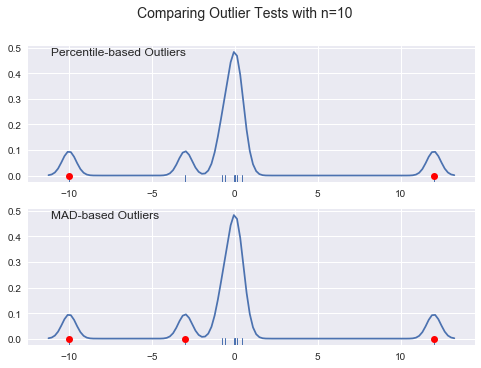

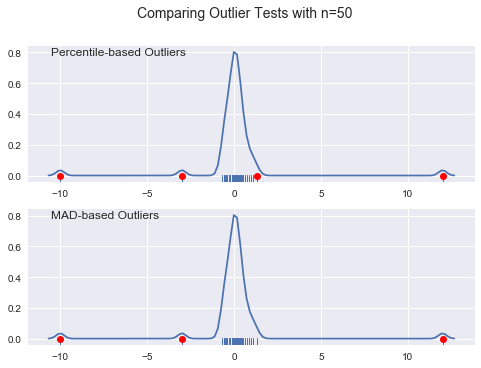

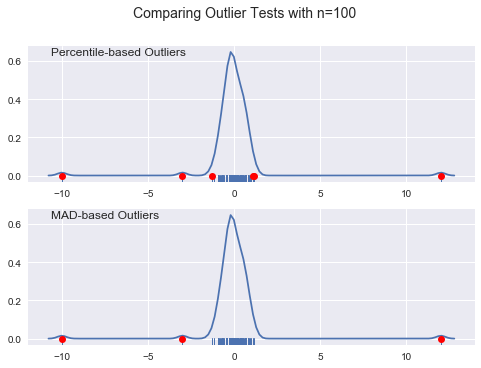

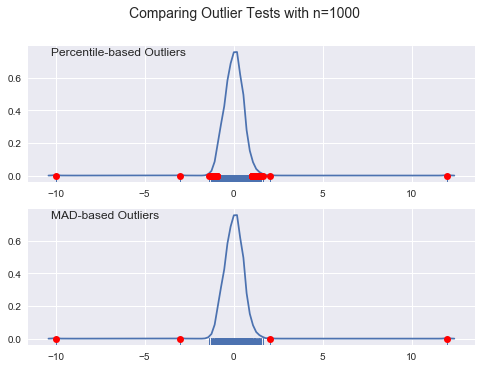

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    for num in [10, 50, 100, 1000]:
        # Generate some data
        x = np.random.normal(0, 0.5, num-3)

        # Add three outliers...
        x = np.r_[x, -3, -10, 12]
        plot(x)

    plt.show()

def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

def plot(x):
    fig, axes = plt.subplots(nrows=2)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=14)

main()

Notice that the MAD-based classifier works correctly regardless of sample-size, while the percentile based classifier classifies more points the larger the sample size is, regardless of whether or not they are actually outliers.

# For pyod, please use r-tensorflow conda env from windows prompt.

# Example of using LOF for outlier detection

c:\users\gmanish\appdata\local\continuum\anaconda\envs\r-tensorflow\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, p=2)

c:\users\gmanish\appdata\local\continuum\anaconda\envs\r-tensorflow\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



On Training Data:
LOF ROC:0.9997, precision @ rank n:0.95

On Test Data:
LOF ROC:1.0, precision @ rank n:1.0


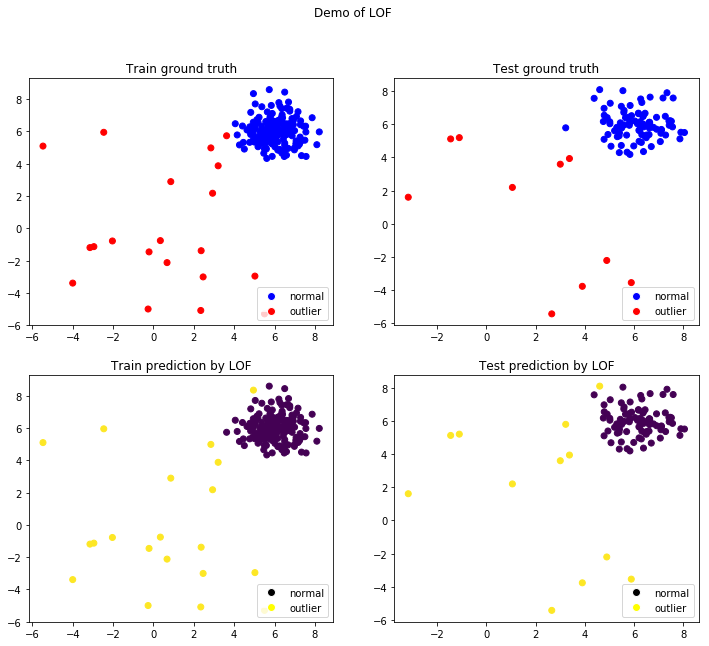

In [4]:
# Author: Yue Zhao <yuezhao@cs.toronto.edu>
# License: BSD 2 clause

import os
import sys

from sklearn.utils import check_X_y
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pyod

from pyod.models.lof import LOF
from pyod.utils.data import generate_data
from pyod.utils.data import get_color_codes
from pyod.utils.data import evaluate_print

def visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True,
              save_figure=False):  
    if X_train.shape[1] != 2 or X_test.shape[1] != 2:
        raise ValueError("Input data has to be 2-d for visualization. The "
                         "input data has {shape}.".format(shape=X_train.shape))
#Checks X and y for consistent length, enforces X 2d and y 1d. 
#Standard input checks are only applied to y, such as checking that y does not have np.nan or np.inf targets.
    X_train, y_train = check_X_y(X_train, y_train)
    X_test, y_test = check_X_y(X_test, y_test)
    c_train = get_color_codes(y_train)
    c_test = get_color_codes(y_test)

    fig = plt.figure(figsize=(12, 10))
    plt.suptitle("Demo of {clf_name}".format(clf_name=clf_name))

    fig.add_subplot(221)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=c_train)
    plt.title('Train ground truth')
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='normal',
                              markerfacecolor='b', markersize=8),
                       Line2D([0], [0], marker='o', color='w', label='outlier',
                              markerfacecolor='r', markersize=8)]

    plt.legend(handles=legend_elements, loc=4)

    fig.add_subplot(222)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=c_test)
    plt.title('Test ground truth')
    plt.legend(handles=legend_elements, loc=4)

    fig.add_subplot(223)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_pred)
    plt.title('Train prediction by {clf_name}'.format(clf_name=clf_name))
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='normal',
                              markerfacecolor='0', markersize=8),
                       Line2D([0], [0], marker='o', color='w', label='outlier',
                              markerfacecolor='yellow', markersize=8)]
    plt.legend(handles=legend_elements, loc=4)

    fig.add_subplot(224)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred)
    plt.title('Test prediction by {clf_name}'.format(clf_name=clf_name))
    plt.legend(handles=legend_elements, loc=4)

    if save_figure:
        plt.savefig('{clf_name}.png'.format(clf_name=clf_name), dpi=300)
    if show_figure:
        plt.show()
    return


if __name__ == "__main__":
    contamination = 0.1  # percentage of outliers
    n_train = 200  # number of training points
    n_test = 100  # number of testing points

    # Generate sample data
    X_train, y_train, X_test, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)

    # train LOF detector
    clf_name = 'LOF'
    clf = LOF()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores

    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)

# Example of using Cluster-based Local Outlier Factor (CBLOF) for outlier detection

c:\users\gmanish\appdata\local\continuum\anaconda\envs\r-tensorflow\lib\site-packages\numpy\matrixlib\defmatrix.py:68: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
c:\users\gmanish\appdata\local\continuum\anaconda\envs\r-tensorflow\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CBLOF(alpha=0.9, beta=5, clustering_estimator=None, contamination=0.1,
   n_clusters=8, random_state=None, use_weights=False)

c:\users\gmanish\appdata\local\continuum\anaconda\envs\r-tensorflow\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



On Training Data:
CBLOF ROC:0.9978, precision @ rank n:0.95

On Test Data:
CBLOF ROC:0.9989, precision @ rank n:0.9


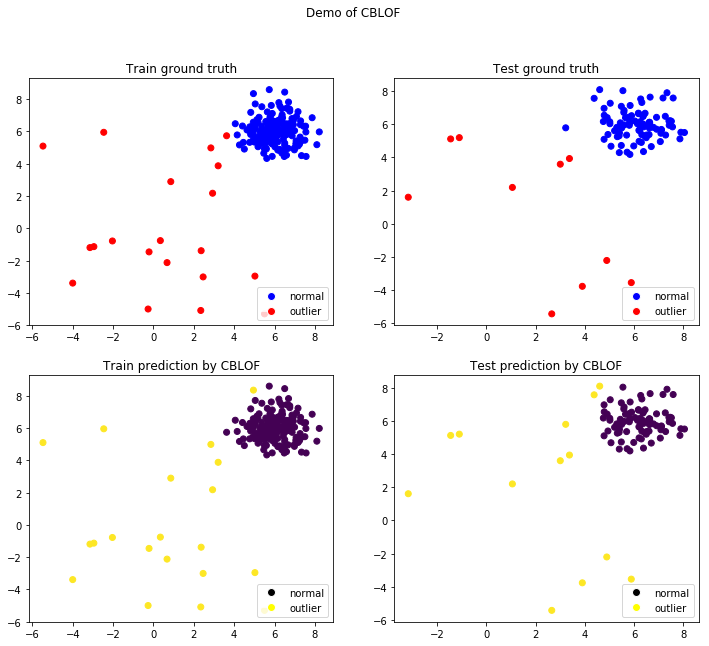

In [5]:
# Author: Yue Zhao <yuezhao@cs.toronto.edu>
# License: BSD 2 clause

from __future__ import division
from __future__ import print_function

import os
import sys

from sklearn.utils import check_X_y
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from pyod.models.cblof import CBLOF
from pyod.utils.data import generate_data
from pyod.utils.data import get_color_codes
from pyod.utils.data import evaluate_print


if __name__ == "__main__":
    contamination = 0.1  # percentage of outliers
    n_train = 200  # number of training points
    n_test = 100  # number of testing points

    # Generate sample data
    X_train, y_train, X_test, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)

    # train CBLOF detector
    clf_name = 'CBLOF'
    clf = CBLOF()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores

    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)

# Example of using one class SVM for outlier detection using pyod

c:\users\gmanish\appdata\local\continuum\anaconda\envs\r-tensorflow\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, random_state=None, shrinking=True,
   tol=0.001, verbose=False)

c:\users\gmanish\appdata\local\continuum\anaconda\envs\r-tensorflow\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



On Training Data:
OneClassSVM ROC:0.9992, precision @ rank n:0.95

On Test Data:
OneClassSVM ROC:1.0, precision @ rank n:1.0


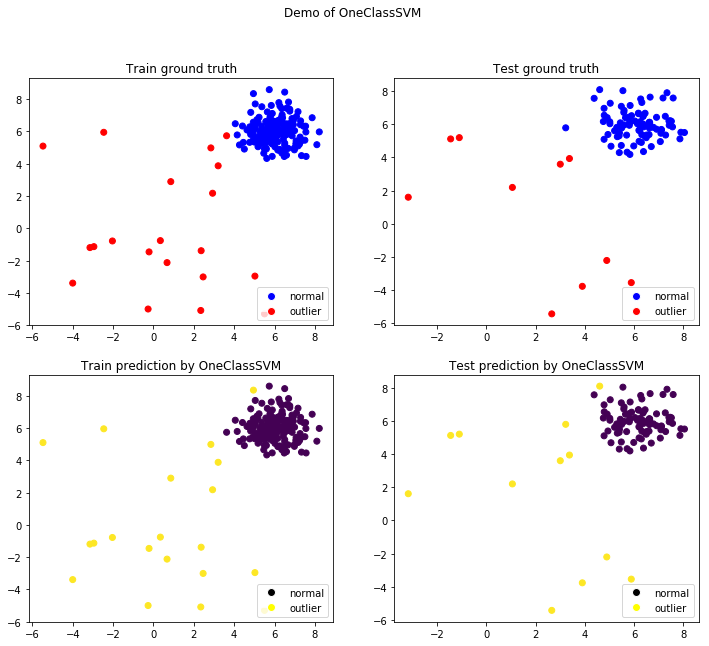

In [12]:
# Author: Yue Zhao <yuezhao@cs.toronto.edu>
# License: BSD 2 clause

import os
import sys

from sklearn.utils import check_X_y
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from pyod.models.ocsvm import OCSVM
from pyod.utils.data import generate_data
from pyod.utils.data import get_color_codes
from pyod.utils.data import evaluate_print
if __name__ == "__main__":
    contamination = 0.1  # percentage of outliers
    n_train = 200  # number of training points
    n_test = 100  # number of testing points

    # Generate sample data
    X_train, y_train, X_test, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)

    # train one_class_svm detector
    clf_name = 'OneClassSVM'
    clf = OCSVM()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores

    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)

# Example of using PCA for outlier detection

c:\users\gmanish\appdata\local\continuum\anaconda\envs\r-tensorflow\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


PCA(contamination=0.1, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

c:\users\gmanish\appdata\local\continuum\anaconda\envs\r-tensorflow\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



On Training Data:
PCA ROC:0.8964, precision @ rank n:0.8

On Test Data:
PCA ROC:0.9033, precision @ rank n:0.8


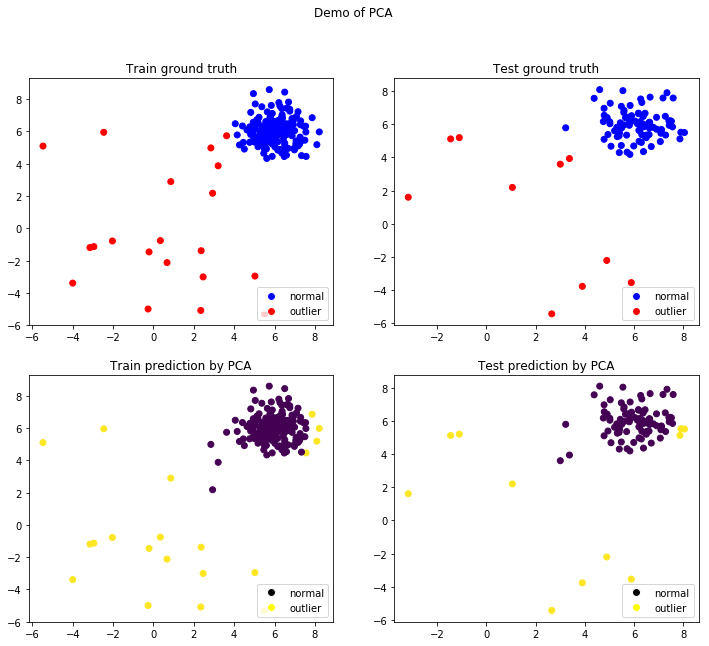

In [14]:
# Author: Yue Zhao <yuezhao@cs.toronto.edu>
# License: BSD 2 clause

import os
import sys

from sklearn.utils import check_X_y
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from pyod.models.pca import PCA
from pyod.utils.data import generate_data
from pyod.utils.data import get_color_codes
from pyod.utils.data import evaluate_print



if __name__ == "__main__":
    contamination = 0.1  # percentage of outliers
    n_train = 200  # number of training points
    n_test = 100  # number of testing points

    # Generate sample data
    X_train, y_train, X_test, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)

    # train PCA detector
    clf_name = 'PCA'
    clf = PCA()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores

    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)

# One class SVM using scikit learn for outlier detection
Scikit-learn implements One-class SVM algorithm, which detects the soft boundary of that set so as to classify new points as belonging to that set or not. The class that implements this is called OneClassSVM.

(200, 2)

(40, 2)

(20, 2)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

Text(0.5,1,'Novelty Detection')

(-5.0, 5.0, -5.0, 5.0)

(-5, 5)

(-5, 5)

Text(0.5,0,'error train: 21/200 ; errors novel regular: 2/40 ; errors novel abnormal: 0/20')

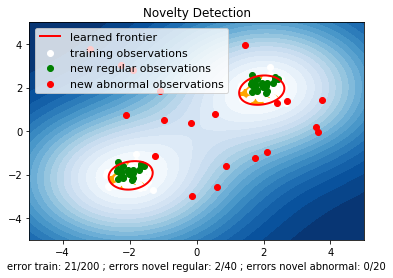

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
 
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

X_train.shape
X_test.shape
X_outliers.shape
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
 
# plot the line, the points, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 20), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')
 
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/20"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()

In [ ]:
More examples at
http://scikit-learn.org/stable/auto_examples/covariance/plot_outlier_detection.html